# ResNet152 Framework

### With tensorflow ResNet152 applied

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, losses, Model

In [36]:
from keras.datasets import cifar10

In [23]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

In [30]:
len(x_train)

50000

In [31]:

#x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
#x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
#x_train = tf.expand_dims(x_train, axis=3, name=None)
#x_test = tf.expand_dims(x_test, axis=3, name=None)
#x_train = tf.repeat(x_train, 3, axis=3)
#x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

In [26]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
    layer.trainable = False

In [27]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [28]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [32]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
750/750 [==============================] - 259s 323ms/step - loss: 1.3790 - accuracy: 0.5484 - val_loss: 1.1914 - val_accuracy: 0.5790
Epoch 2/40
750/750 [==============================] - 232s 310ms/step - loss: 1.0353 - accuracy: 0.6325 - val_loss: 1.1409 - val_accuracy: 0.6025
Epoch 3/40
750/750 [==============================] - 230s 307ms/step - loss: 0.9239 - accuracy: 0.6707 - val_loss: 1.1196 - val_accuracy: 0.6230
Epoch 4/40
750/750 [==============================] - 225s 300ms/step - loss: 0.8273 - accuracy: 0.7038 - val_loss: 1.1240 - val_accuracy: 0.6365
Epoch 5/40
750/750 [==============================] - 227s 303ms/step - loss: 0.7325 - accuracy: 0.7377 - val_loss: 1.2517 - val_accuracy: 0.6025
Epoch 6/40
750/750 [==============================] - 242s 322ms/step - loss: 0.6420 - accuracy: 0.7694 - val_loss: 1.2847 - val_accuracy: 0.6245
Epoch 7/40
750/750 [==============================] - 232s 309ms/step - loss: 0.5590 - accuracy: 0.8001 - val_loss: 1.4080 -

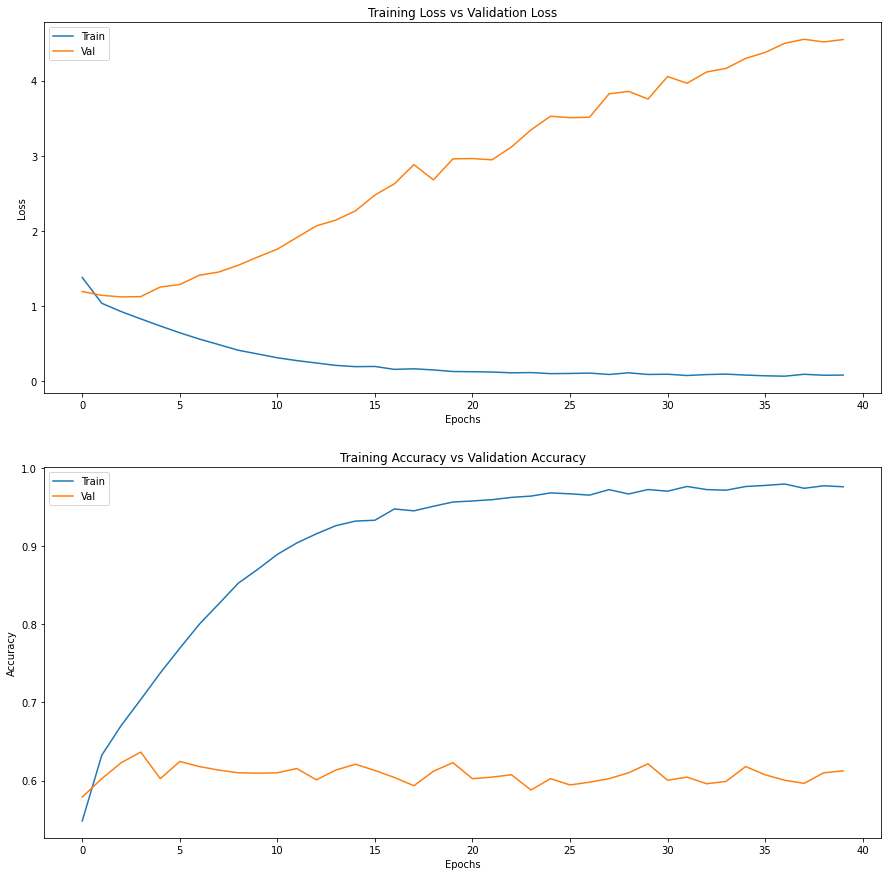

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [34]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 52s 166ms/step - loss: 4.7262 - accuracy: 0.5967


[4.726167678833008, 0.5967000126838684]

The accuracy on testing set shows the training set is overfitting.

In [ ]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_val, y_val))